제 2장 예제
========
2013-11392 김지현

In [1]:
import lzma
import pandas as pd
from matplotlib import pyplot as plt

cdc = pd.read_csv(lzma.open('cdc.txt.xz'), sep=' ')

from warnings import filterwarnings
from matplotlib import MatplotlibDeprecationWarning
filterwarnings('ignore', category=MatplotlibDeprecationWarning)

## 예제 1. genhlth 변수에 대해 적절한 방법을 이용하여 요약해보자. 범주형 자료의 경우에는 어떠한 요약 방법을 사용할 수 있는가?
genhlth 변수는 1차원 범주형(명목형) 자료이다. 도수분포표, 막대그래프, 원그래프를 쓸 수 있다.

,frequency,relative frequency
excellent,4657,0.23285
very good,6972,0.34860
good,5675,0.28375
fair,2019,0.10095
poor,677,0.03385


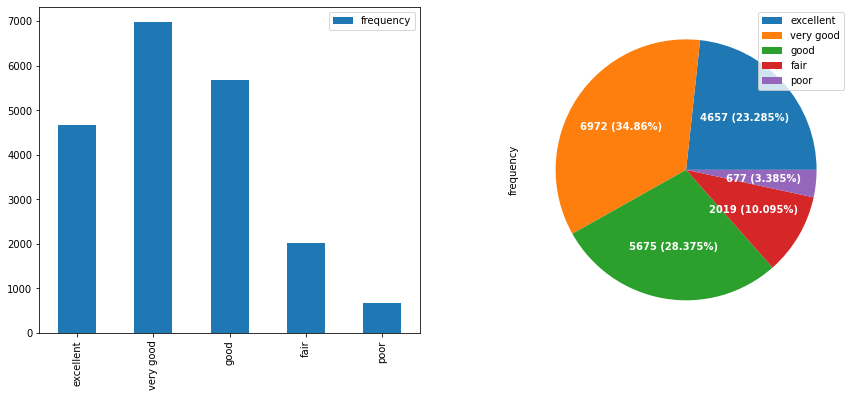

In [2]:
freq = cdc.genhlth.value_counts().reindex(['excellent', 'very good', 'good', 'fair', 'poor'])
df = pd.DataFrame({'frequency': freq, 'relative frequency': freq / freq.sum()})

# 도수분포표
display(df)

# 막대그래프, 원그래프
_, axs = plt.subplots(1, 2, figsize=(15, 6))
df.plot.bar(ax=axs[0], y='frequency')
df.plot.pie(ax=axs[1], y='frequency', autopct=lambda pct:f'{round(pct*len(cdc)/100)} ({pct:g}%)', textprops={'color': 'w', 'weight': 'bold'})
plt.show()

## 예제 2. weight 변수에 대한 수치적 요약 값을 구해보자. 전체 응답자의 평균 몸무게는 얼마인가?

In [3]:
weight = cdc.weight
print(f'''\
다섯가지 요약수치:
  최솟값\t\t: {weight.min()} lbs
  제 1 사분위 수\t: {weight.quantile(0.25)} lbs
  제 2 사분위 수\t: {weight.quantile()} lbs
  제 3 사분위 수\t: {weight.quantile(0.75)} lbs
  최댓값\t\t: {weight.max()} lbs

평균 몸무게\t: {weight.mean()} lbs
표준편차\t: {weight.std()} lbs
분산\t\t: {weight.var()} lbs^2
''')

다섯가지 요약수치:
  최솟값		: 68 lbs
  제 1 사분위 수	: 140.0 lbs
  제 2 사분위 수	: 165.0 lbs
  제 3 사분위 수	: 190.0 lbs
  최댓값		: 500 lbs

평균 몸무게	: 169.68295 lbs
표준편차	: 40.08096996712 lbs
분산		: 1606.4841535051753 lbs^2



## 예제 3. weight 변수와 wtdesire 변수의 산점도를 그려보자. 두 변수 사이에는 어떠한 관계가 존재한다고 보여지는가? 두 변수의 상관계수는 무엇은 나타내고 있는가?
양의 상관관계가 존재한다고 생각할 수 있다. 높은 숫자의 상관계수를 통해, 두 변수 사이에 높은 상관도가 존재한다고 볼 수 있다.

상관계수: 0.8000521278515001



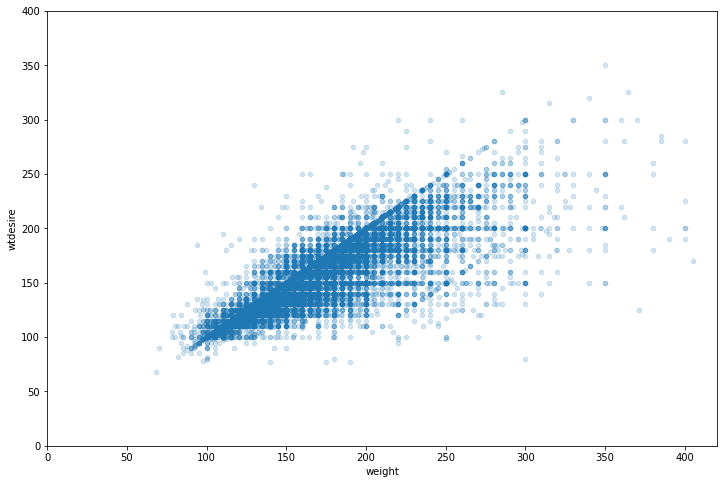

In [4]:
print(f'상관계수: {cdc.corr().weight.wtdesire}\n')

cdc.plot.scatter('weight', 'wtdesire', c='#1F77B430', figsize=(12, 8), ylim=(0, 400), xlim=(0, 420))
plt.show()

## 예제 4. wtdesire 변수와 weight 변수의 차를 계산하여 새로운 변수 wdiff 를 만들어보자. wdiff 의 분포는 어떠한가? 수치적 요약과 그래프 요약을 통해 살펴보자. 이것이 의미하는 바는 무엇인가?
wdiff는 수치형(연속형) 자료이다. 위치통계량(평균, 사분위수, 최빈값)과 산포통계량(표준편차, 사분위수범위)으로 수치적인 요약이 가능하고, 그래프는 히스토그램 등으로 그릴 수 있다.

아래의 결과를 보았을 때, 많은 사람들은 자신의 몸무게에 만족하나, 자신의 몸무게에 만족하지 못하는 사람들은 주로 현재보다 감량을 원하는것을 알 수 있다.

평균		: -14.5891 lbs
최빈값		: 0 lbs

다섯가지 요약수치:
  최솟값		: -300 lbs
  제 1 사분위 수	: -21.0 lbs
  제 2 사분위 수	: -10.0 lbs
  제 3 사분위 수	: 0.0 lbs
  최댓값		: 500 lbs

표준편차	: 24.045855596101532 lbs
사분위수범위	: 21.0 lbs


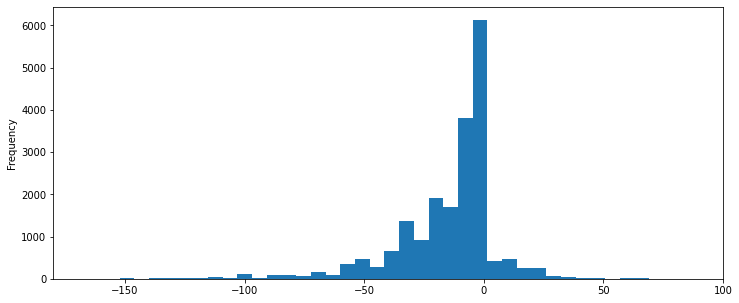

In [5]:
wdiff = cdc.wtdesire - cdc.weight

print(f'''\
평균\t\t: {wdiff.mean()} lbs
최빈값\t\t: {wdiff.mode()[0]} lbs

다섯가지 요약수치:
  최솟값\t\t: {wdiff.min()} lbs
  제 1 사분위 수\t: {wdiff.quantile(0.25)} lbs
  제 2 사분위 수\t: {wdiff.quantile()} lbs
  제 3 사분위 수\t: {wdiff.quantile(0.75)} lbs
  최댓값\t\t: {wdiff.max()} lbs

표준편차\t: {wdiff.std()} lbs
사분위수범위\t: {wdiff.quantile(0.75) - wdiff.quantile(0.25)} lbs\
''')

wdiff.plot.hist(bins=130, figsize=(12, 5), xlim=(-180, 100))
plt.show()

## 예제 5. age 변수를 이용하여 히스토그램을 그려보자. 그리고 구간의 수를 50, 100으로 바꿔가며 동일한 히스토그램을 그린 후 비교해보자.
> (참고) 히스토그램은 자료의 형태를 파악하기 위한 쉬운 방법이지만 구간의 수가 달라짐에 따라 그 모양이 조금씩 달라질 수 있다.

구간의 수를 지나치게 늘릴 경우, "40.2세 이상 40.9세 미만"과 같이 불가능하고 무의미한 구간이 발생하여 데이터의 분포를 해석하는데에 오히려 방해가 됨을 아래의 세 히스토그램을 통해 발견할 수 있다.

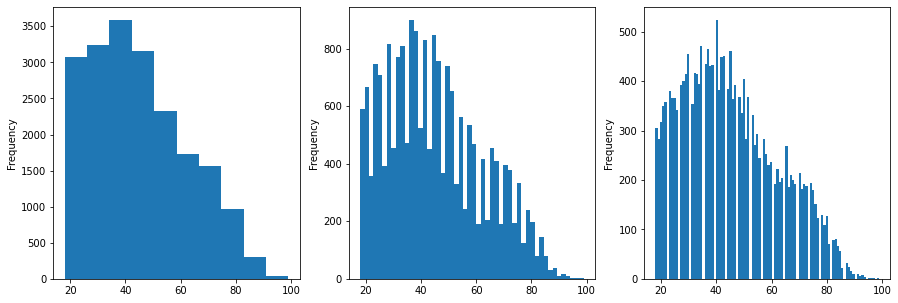

In [6]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))
cdc.age.plot.hist(ax=axs[0])
cdc.age.plot.hist(ax=axs[1], bins=50)
cdc.age.plot.hist(ax=axs[2], bins=100)
plt.show()